<a href="https://colab.research.google.com/github/oliviachchoi/KaggleStudies/blob/main/titanic_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic으로 여러가지 적용 해 보기

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
train= pd.read_csv('/content/drive/MyDrive/kaggle/kaggle_titanic/train.csv')
test=pd.read_csv('/content/drive/MyDrive/kaggle/kaggle_titanic/test.csv')

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
train.shape

(891, 12)

In [94]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
train=train[train.Embarked.isna()==False]

In [96]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

간단한 시각화 후 전처리

In [97]:
#1. 각 변수에 대해 시각화
cat= ['Pclass','Sex','SibSp','Parch','Embarked']
cont=['Age','Fare']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

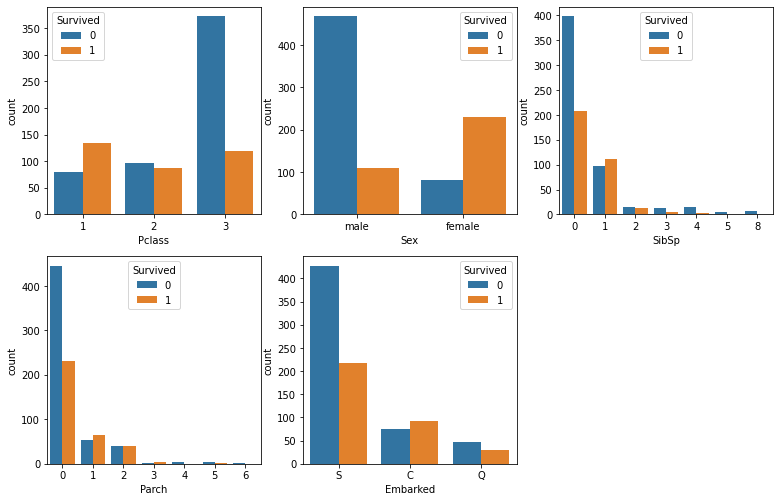

In [98]:
#0=Dead, #1=Survived
fig = plt.figure(figsize=(13,13))
for i in range(len(cat)):
  fig.add_subplot(3,3,i+1)
  sns.countplot(train[cat[i]],hue=train.Survived)
#종속변수에 영향을 끼치는 변수들로 보임.

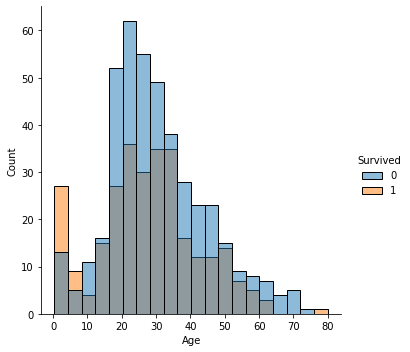

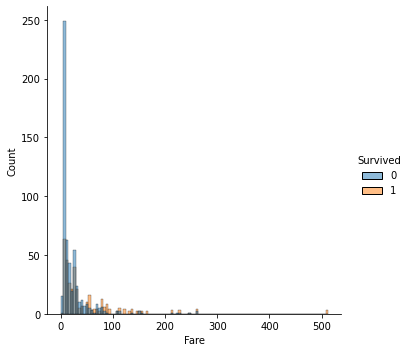

In [99]:
for i in range(len(cont)):
  fig.add_subplot(1,2,i+1)
  sns.displot(data=train,x=cont[i],hue='Survived')
  #Age=> younger people(0~10) survived more than death
  #Fare 낮은 사람이 비교적 사망률이 높게 나옴.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


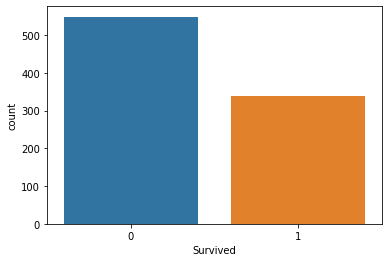

In [100]:
#종속변수 확인
train.Survived.value_counts()
sns.countplot(train.Survived) #more deaths than survivors

In [101]:
#passengerId drop
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [102]:
#분석 못 해봤던 name, ticket Embarked 적용 해 보기
len(train.Ticket.unique())

680

In [103]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 889, dtype: object

In [104]:
import re
Ticket= train['Ticket'].str.replace('[^a-zA-Z#]','')

In [105]:
Ticket.value_counts()[:5]

         659
PC        60
CA        41
A         28
STONO     18
Name: Ticket, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


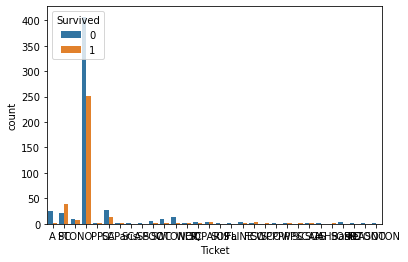

In [106]:
sns.countplot(Ticket,hue=train.Survived)

In [107]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Embarked & sex
train['Sex'].astype('category')
train['Embarked'].astype('category')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [108]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [109]:
train['Sex']= le.fit_transform(train['Sex'])

In [110]:
train['Embarked']=le.fit_transform(train['Embarked'])

In [112]:
train['Sex'].astype(int)
train['Embarked'].astype(int)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 889, dtype: int64

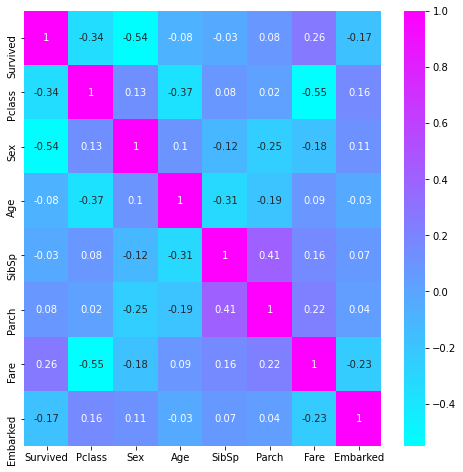

In [117]:
fig = plt.figure(figsize=(8,8))
corr=train.corr().round(2)
sns.heatmap(corr,annot=True,cmap='cool')
#Age, Sibsp, Parch look like they don't have much correlation with the y(Survived)

In [127]:
train['Cabin1']=train['Cabin'].str.replace('[^a-zA-Z#]','')

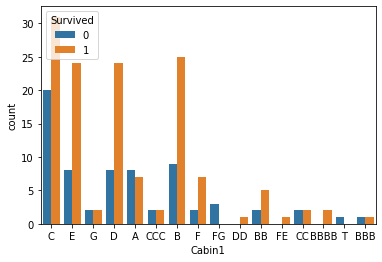

In [128]:
sns.countplot(x=train['Cabin1'],hue=train['Survived'])

In [138]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [132]:
#우선 cabin의 결측치가 너무 많기 때문에 drop을 해서 분석 먼저 해보기
train.drop('Cabin1',inplace=True,axis=1)

In [139]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [140]:
train['Age']=train['Age'].fillna(train.Age.mean())

In [141]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

회귀분석

In [143]:
import statsmodels.api as sm

Y=train['Survived']
X=train.drop(['Survived','Name','Ticket','Cabin'],axis=1)
model=sm.OLS(Y,X)
results= model.fit()
print(results.summary())
#Parch의 pvalue가 너무 높게 나옴 drop?

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.485
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              118.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                   1.22e-122
Time:                        11:01:23   Log-Likelihood:                         -538.93
No. Observations:                 889   AIC:                                      1092.
Df Residuals:                     882   BIC:                                      1125.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


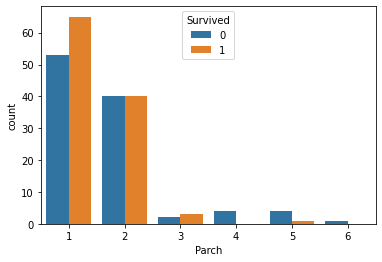

In [153]:
sns.countplot(Parch_df.Parch, hue=Parch_df.Survived)

In [152]:
Parch_df= train[train.Parch!= 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


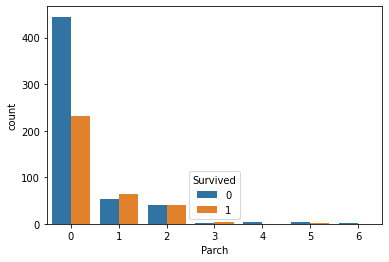

In [146]:
train.Parch
sns.countplot(train.Parch,hue=train.Survived)

In [155]:
Y=train['Survived']
X=train.drop(['Survived','Name','Ticket','Cabin','Parch'],axis=1)
model=sm.OLS(Y,X)
results= model.fit()
print(results.summary())
#Parch변수 빼도 모델이 막 좋아지진 않음. R값 낮음 
#feature engineering 해야 할 것 같다

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.485
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              138.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                   9.95e-124
Time:                        11:08:40   Log-Likelihood:                         -538.94
No. Observations:                 889   AIC:                                      1090.
Df Residuals:                     883   BIC:                                      1119.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [156]:
#Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, Y)
scaler=StandardScaler()


In [157]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [160]:
#logistic regression

model=LogisticRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.8018018018018018


추가적으로 feature engineering과 classification도 적용 해 볼 수 있지만 일단은 프로젝트가 더 급하기 때문에 프로젝트를 하겠습니다.. 